Principal Component Analysis (PCA) is linear dimensionality reduction technique that is used for extracting information from high-dimensional data by projecting it into a lower-dimensional data. It tries to preserve the essential parts that have more variation of data and remove the non-essential parts with fewer variation. 

Dimensions are features that represent the data. As example, 28 to 28 image has 784 picture elements (pixels) that are dimensions or features which together represent that image.  

PCA is Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).  

In [64]:
import numpy as np
import pandas as pd 

In [65]:
from keras.datasets import cifar10

In [66]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [67]:
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [68]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [69]:
classes = np.unique(y_train)
nClasess = len(classes)

In [70]:
print('Total number of outputs:', nClasess)
print('Output classes:', classes)

Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
label_dict = { 
    
0: 'airplane',
1: 'automobile',
2: 'bird',
3: 'cat',
4: 'deer',
5: 'dog',
6: 'frog',
7: 'horse',
8: 'ship',
9: 'truck',
}

In [73]:
plt.figure(figsize=[5,5])
plt.subplot

<function matplotlib.pyplot.subplot>

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, '(Label: frog)')


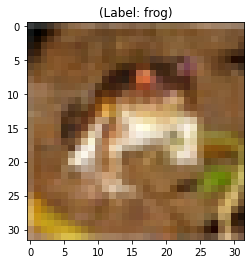

In [74]:
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)

print(plt.title("(Label: " +  str(label_dict[y_train[0][0]]) + ")"))


Text(0.5, 1.0, '(Label: cat)')


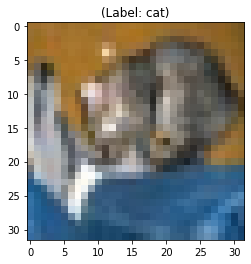

In [75]:
plt.subplot

curr_img = np.reshape(x_test[0], (32,32,3))
plt.imshow(curr_img)

print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) +')' ))

In [76]:
np.min(x_train),np.max(x_train)

(0, 255)

In [77]:
x_train = x_train/255

In [78]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [79]:
x_train.shape

(50000, 32, 32, 3)

In [80]:
x_train_flat = x_train.reshape(-1,3072)

In [81]:
feat_colm = ['pixel'+ str(i) for i in range(x_train_flat.shape[1])] 

In [82]:
df_cifar = pd.DataFrame(x_train_flat, columns=feat_colm)

In [83]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))


Size of the dataframe: (50000, 3073)


In [84]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,0.211765,0.164706,0.384314,0.286275,0.203922,0.466667,0.356863,0.247059,0.545098,0.419608,0.294118,0.568627,0.431373,0.313725,0.584314,0.458824,0.349020,0.584314,0.470588,0.364706,0.513725,0.403922,0.301961,0.490196,0.388235,0.298039,0.556863,0.450980,0.356863,0.564706,...,0.580392,0.403922,0.301961,0.631373,0.411765,0.270588,0.564706,0.372549,0.215686,0.439216,0.352941,0.231373,0.466667,0.356863,0.227451,0.509804,0.376471,0.254902,0.470588,0.341176,0.231373,0.360784,0.262745,0.180392,0.403922,0.305882,0.223529,0.666667,0.549020,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,0.396078,0.388235,0.490196,0.513725,0.545098,0.607843,0.650980,0.705882,0.674510,0.745098,0.823529,0.705882,0.780392,0.839216,0.556863,0.611765,0.611765,0.435294,0.470588,0.431373,0.415686,0.419608,0.384314,0.427451,0.407843,0.400000,0.482353,0.474510,0.458824,0.498039,...,0.019608,0.023529,0.043137,0.023529,0.023529,0.043137,0.039216,0.035294,0.047059,0.098039,0.086275,0.086275,0.200000,0.176471,0.164706,0.266667,0.250980,0.262745,0.352941,0.352941,0.396078,0.454902,0.443137,0.478431,0.525490,0.498039,0.521569,0.549020,0.509804,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.298039,0.352941,0.352941,0.282353,0.337255,0.337255,0.250980,0.305882,0.305882,0.250980,0.305882,0.305882,0.270588,0.325490,0.325490,0.258824,0.313725,0.313725,0.215686,0.270588,0.270588,0.203922,0.258824,0.258824,0.227451,0.282353,0.282353,0.266667,0.313725,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,0.145098,0.090196,0.172549,0.152941,0.098039,0.156863,0.145098,0.086275,0.156863,0.149020,0.090196,0.094118,0.090196,0.035294,0.125490,0.098039,0.058824,0.168627,0.105882,0.074510,0.117647,0.078431,0.039216,0.125490,0.117647,0.066667,0.160784,0.145098,0.090196,0.203922,...,0.478431,0.388235,0.262745,0.419608,0.333333,0.211765,0.439216,0.376471,0.258824,0.360784,0.317647,0.207843,0.313725,0.243137,0.152941,0.376471,0.305882,0.231373,0.301961,0.262745,0.164706,0.333333,0.298039,0.172549,0.329412,0.294118,0.188235,0.262745,0.223529,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,0.756863,0.827451,0.709804,0.768627,0.854902,0.694118,0.764706,0.862745,0.709804,0.764706,0.874510,0.721569,0.752941,0.874510,0.741176,0.745098,0.874510,0.741176,0.741176,0.870588,0.737255,0.756863,0.878431,0.717647,0.760784,0.874510,0.713725,0.760784,0.874510,0.721569,...,0.364706,0.384314,0.400000,0.352941,0.372549,0.

In [85]:
from sklearn.decomposition import PCA 

In [86]:
pca_cifar = PCA(n_components = 2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [87]:
principal_cifar_Df = pd.DataFrame(data=principalComponents_cifar, columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [88]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [89]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


about 40% of information retained by principal component 1 and 2, given that the data was projected from 3072 dimensions to a mere two principal components.  

There is the visualization of CIFAR-10 data in a two-dimensional space. 

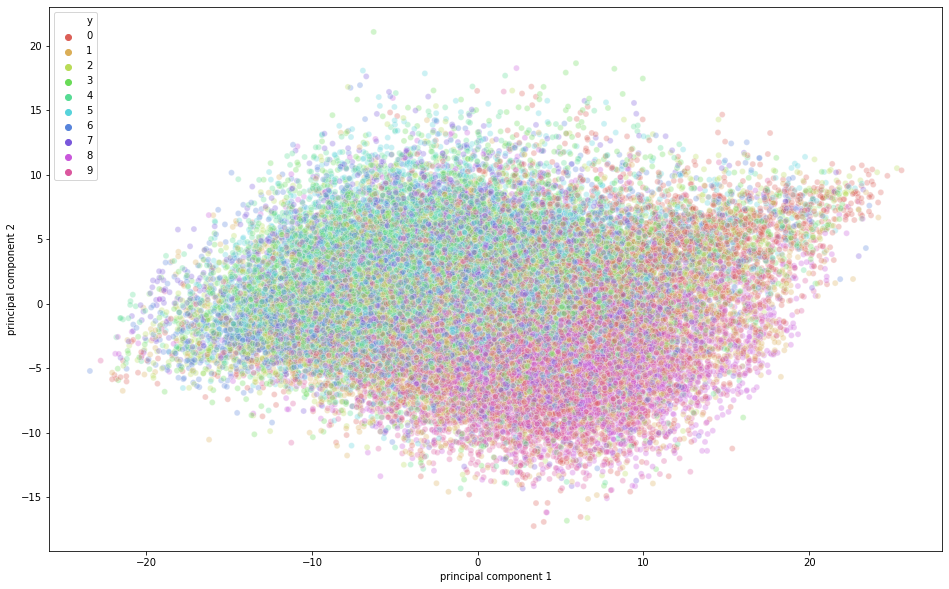

In [90]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = 'principal component 1', y = 'principal component 2', 
    hue = 'y',
    palette = sns.color_palette('hls', 10),
    data = principal_cifar_Df,
    legend = 'full',
    alpha = 0.3
)

Images or points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other. 

## **Speed up Deep Learning Training using PCA with CIFAR-10 Dataset**

In [91]:
x_test = x_test / 255.0

In [92]:
np.min(x_test),np.max(x_test)

(0.0, 1.0)

In [93]:
x_test.shape

(10000, 32, 32, 3)

In [94]:
x_test = x_test.reshape(-1,32,32,3)

In [95]:
x_test_flat = x_test.reshape(-1, 3072)

In [96]:
pca = PCA(0.9)

In [97]:
pca.fit(x_train_flat)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [98]:
pca.n_components_

99

In [99]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)


In [100]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils 
from keras.optimizers import RMSprop

In [101]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [102]:
batch_size = 128
num_classes = 10
epochs = 20 

In [103]:
model = Sequential()
model.add(Dense(1024, activation = 'relu', input_shape=(99,)))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              102400    
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(loss='categorical_crossentropy', optimizer = RMSprop(), metrics=['accuracy'])


history = model.fit(train_img_pca, y_train, batch_size = batch_size, epochs = epochs, verbose=1, 
                   validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 23s 59ms/step - loss: 1.6354 - accuracy: 0.4166 - val_loss: 1.4415 - val_accuracy: 0.4886
Epoch 2/20
391/391 [==============================] - 23s 58ms/step - loss: 1.3167 - accuracy: 0.5323 - val_loss: 1.3112 - val_accuracy: 0.5335
Epoch 3/20
391/391 [==============================] - 23s 58ms/step - loss: 1.1392 - accuracy: 0.5943 - val_loss: 1.2889 - val_accuracy: 0.5519
Epoch 4/20
391/391 [==============================] - 23s 58ms/step - loss: 0.9817 - accuracy: 0.6470 - val_loss: 1.3263 - val_accuracy: 0.5622
Epoch 5/20
391/391 [==============================] - 23s 59ms/step - loss: 0.8350 - accuracy: 0.6990 - val_loss: 1.4627 - val_accuracy: 0.5609
Epoch 6/20
391/391 [==============================] - 22s 57ms/step - loss: 0.6969 - accuracy: 0.7491 - val_loss: 1.5557 - val_accuracy: 0.5456
Epoch 7/20
391/391 [==============================] - 22s 57ms/step - loss: 0.5769 - accuracy: 0.7951 - val_loss: 1.6882 - val_accuracy:

Model achieved 94% accuracy on training data while 55% on test data which shows overfitting the training data. However, we have to remember that data was projected from 3072 dimensions to 99 dimensions and despite that it did good job. Time taken for each epoch was 23 seconds on a CPU. 

Now, we can check how much time the model takes to train on the original dataset and how much accuracy it can achieve using the same deep learning model

In [108]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(num_classes, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer = RMSprop(),
              metrics = ['accuracy'])

history = model.fit(x_train_flat, y_train, batch_size = batch_size, epochs = epochs, verbose =1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
391/391 [==============================] - 41s 105ms/step - loss: 2.1855 - accuracy: 0.2360 - val_loss: 1.8811 - val_accuracy: 0.3164
Epoch 2/20
391/391 [==============================] - 42s 107ms/step - loss: 1.8479 - accuracy: 0.3336 - val_loss: 1.8290 - val_accuracy: 0.3593
Epoch 3/20
391/391 [==============================] - 43s 110ms/step - loss: 1.7377 - accuracy: 0.3792 - val_loss: 1.7138 - val_accuracy: 0.3745
Epoch 4/20
391/391 [==============================] - 45s 114ms/step - loss: 1.6670 - accuracy: 0.4005 - val_loss: 1.6646 - val_accuracy: 0.3980
Epoch 5/20
391/391 [==============================] - 44s 113ms/step - loss: 1.6107 - accuracy: 0.4241 - val_loss: 1.5689 - val_accuracy: 0.4422
Epoch 6/20
391/391 [==============================] - 44s 111ms/step - loss: 1.5701 - accuracy: 0.4403 - val_loss: 1.5916 - val_accuracy: 0.4476
Epoch 7/20
391/391 [==============================] - 43s 110ms/step - loss: 1.5365 - accuracy: 0.4514 - val_loss: 1.5439 - val_ac

From the above output, it can be seen that time taken for training of each epoch was about 41 seconds which is twice more than for the model trained on the PCA output. Moreover, both the training and testing accuracy is less than the accuracy achieved with the 99 principal components as an input to the model. Accuracy for training data is 54% while accuracy for test data is about 48%. 

By applying PCA on the training data, it is possible to train deep learning model not only fast, but also achieve more accuracy on the testing data compared with deep learning model trained on original training data. 